Notebook to load the Cetraro graph and to calculate some Fourier vectors 

1. Step: load data set and create the graph

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csgraph
from scipy.linalg import eigh

# Load Excel file
file_path = "PJKJRB_CIME_graph.xlsx"
df = pd.read_excel(file_path)

df_edges = df.iloc[:, [5, 6, 7, 8]]
df_edges.columns = ['F', 'G', 'H', 'I']

# Initialize graph
G = nx.Graph()

# Add edges and weights to graph
for _, row in df_edges.iterrows():
    source = row['F']
    if pd.isna(source):
        continue
    for target in [row['G'], row['H'], row['I']]:
        if pd.notna(target) and target != '/':
            if G.has_edge(source, target):
                G[source][target]['weight'] += 1
            else:
                G.add_edge(source, target, weight=1)

# Create adjacency matrix
A = nx.to_numpy_array(G, weight='weight')
# Remove self-loop at the Cosenza node
A[16,16] = 0

# Print adjacency matrix
print("Adjacency Matrix:\n", A)

Adjacency Matrix:
 [[0. 1. 2. 3. 4. 1. 2. 0. 2. 2. 1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [2. 1. 0. 1. 1. 0. 1. 1. 1. 4. 1. 1. 0. 0. 0. 1. 1. 0.]
 [3. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0.]
 [4. 1. 1. 1. 0. 2. 3. 2. 1. 6. 1. 1. 0. 0. 0. 2. 1. 1.]
 [1. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 2. 1. 0. 0. 0. 0.]
 [2. 0. 1. 1. 3. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 2. 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 2. 0. 0. 0. 0. 0. 0.]
 [2. 0. 4. 0. 6. 0. 1. 2. 1. 0. 2. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 2. 0. 1. 2. 0. 0. 0. 0. 2.]
 [1. 0. 1. 1. 1. 1. 1. 0. 2. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 2. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0

2. Step: plot the graph

C:\Users\wolfi\AppData\Local\Temp\ipykernel_31728\99537294.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


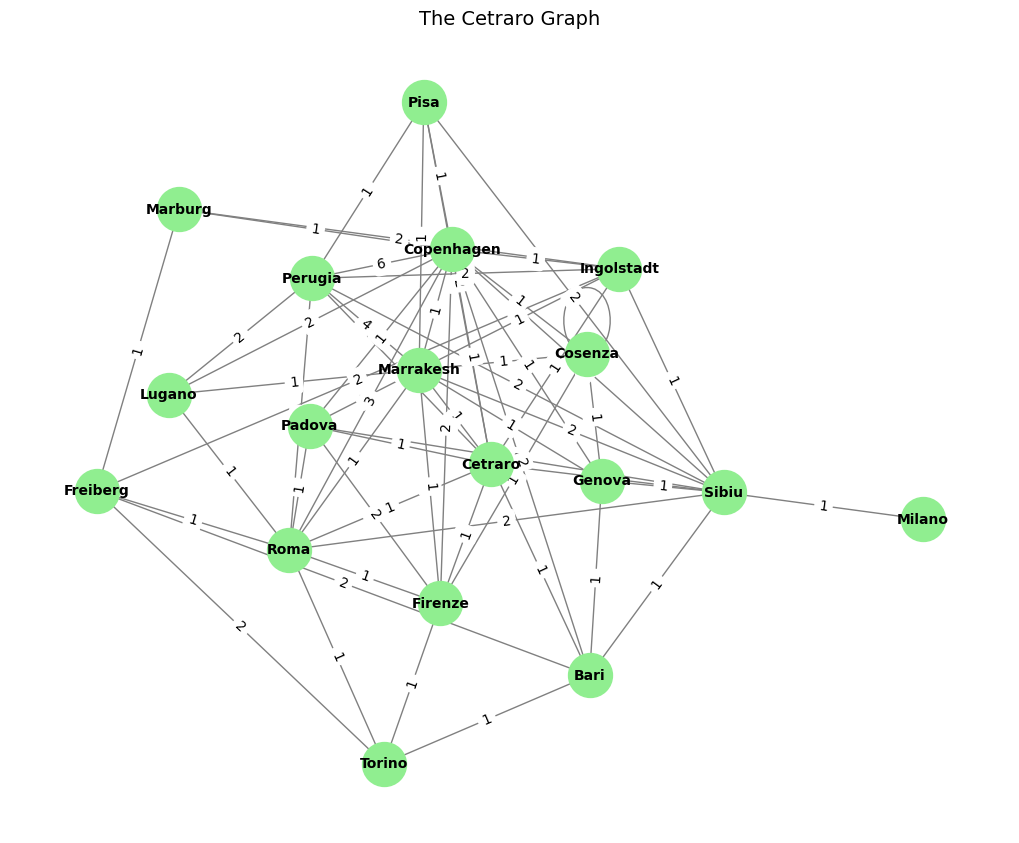

In [6]:
# Plot
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=1000, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("The Cetraro Graph", fontsize=14)
plt.tight_layout()
plt.show()

3. Step: calculate the first 4 eigenvalues/eigenvectors of the graph and plot them

In [ ]:
# Compute degree matrix and its inverse
D = np.diag(A.sum(axis=1))
D_inv = np.linalg.inv(D)

# Compute normalized Laplacian
L_N = np.eye(len(A)) - np.sqrt(D_inv) @ A @ np.sqrt(D_inv)

# Eigen-decomposition of the normalized Laplacian
eigv, U = eigh(L_N)

print("First 4 eigenvalues:\n", eigv[:4])
print("Labels and position of the nodes:\n", pos)

First 4 eigenvalues:
 [2.22044605e-16 4.41926481e-01 6.23760947e-01 7.16939473e-01]
Labels and position of the nodes:
 {'Sibiu': array([ 0.5829005, -0.127538 ]), 'Genova': array([ 0.32778689, -0.10441582]), 'Marrakesh': array([-0.05420709,  0.11269605]), 'Padova': array([-0.28291796,  0.00306524]), 'Copenhagen': array([0.01453926, 0.34826931]), 'Bari': array([ 0.30227124, -0.48587785]), 'Roma': array([-0.32571877, -0.23972846]), 'Lugano': array([-0.57770148,  0.06414862]), 'Pisa': array([-0.04465109,  0.63609981]), 'Perugia': array([-0.27842793,  0.29163263]), 'Ingolstadt': array([0.36465939, 0.31058673]), 'Cetraro': array([ 0.09656379, -0.07248104]), 'Freiberg': array([-0.72834884, -0.12402195]), 'Torino': array([-0.12753492, -0.65840571]), 'Milano': array([ 1.        , -0.18030525]), 'Firenze': array([-0.0099207 , -0.34486643]), 'Cosenza': array([0.296854  , 0.14420195]), 'Marburg': array([-0.55614628,  0.42694016])}


Plot the first 4 eigenvectors as signals on the graph

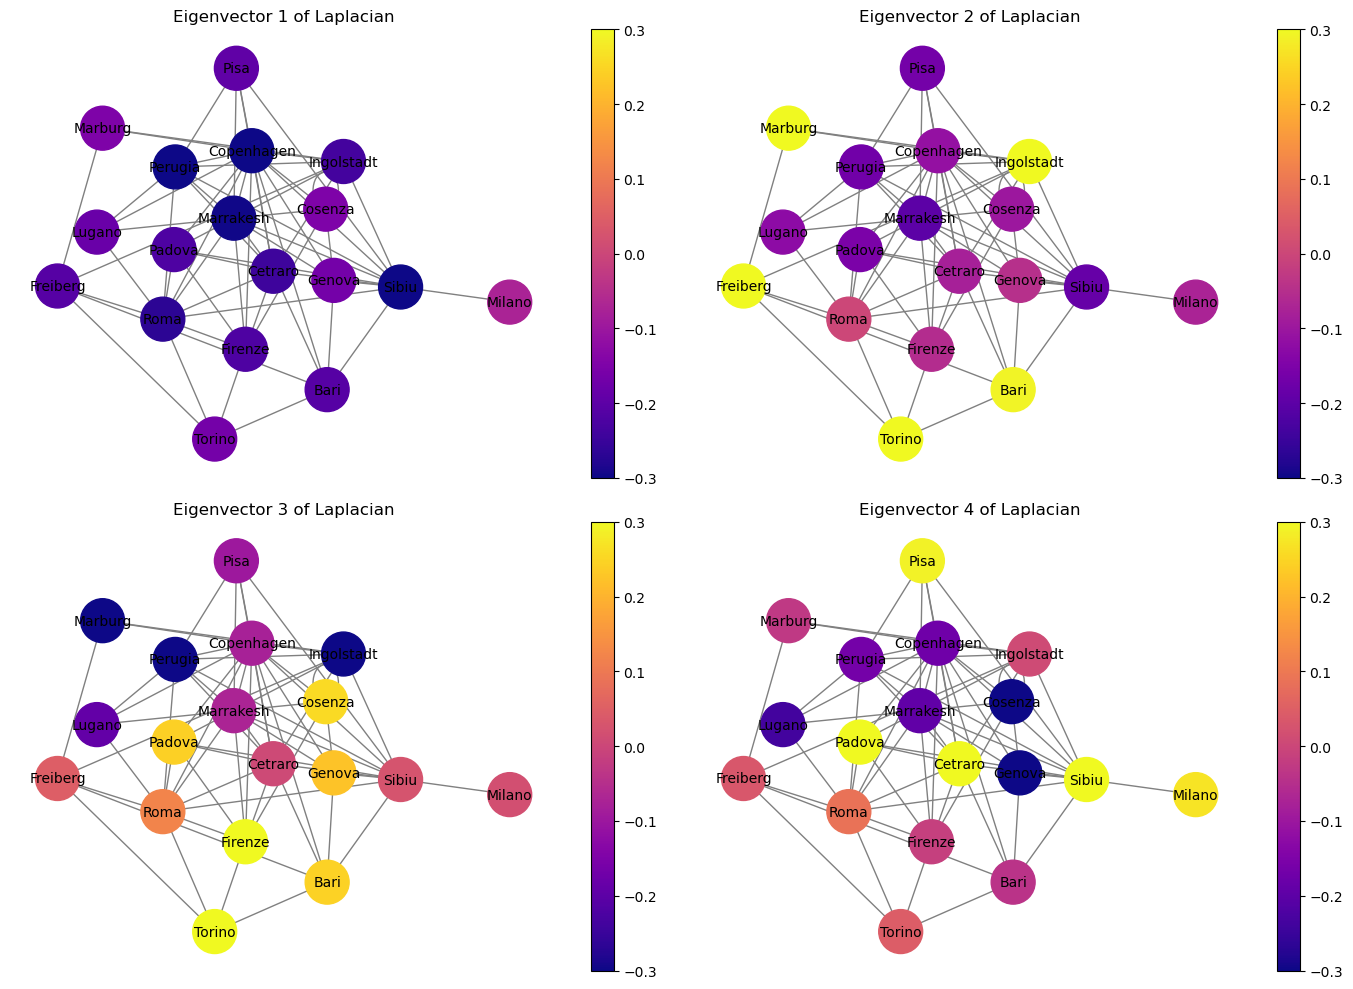

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
pos = nx.kamada_kawai_layout(G)
vmin, vmax = -0.3, 0.3

for i in range(4):
    values = U[:, i]
    nodes = nx.draw(
        G, pos, ax=axes[i], with_labels=True, node_color=values,
        cmap=plt.cm.plasma, edge_color='gray', node_size=1000, font_size=10,
        vmin=vmin, vmax=vmax
    )
    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    plt.colorbar(sm, ax=axes[i])
    axes[i].set_title(f"Eigenvector {i+1} of Laplacian")

plt.tight_layout()